In [1]:
import numpy as np 
import pandas as pd  
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4 )
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN
5,Alfred Village,4089.0,5.0,0.0,NaN,0.0,3.0,2.0,46.0,10.0,36.0,0.0,NaN
6,Allegany Village,1781.0,3.0,0.0,NaN,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0
7,Amherst Town,118296.0,107.0,1.0,NaN,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0
8,Amityville Village,9519.0,9.0,0.0,NaN,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0
9,Amsterdam,18182.0,30.0,0.0,NaN,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0


In [3]:
list(df.columns)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3']

In [4]:
df['Rape\n(revised\ndefinition)1'].unique()

array([nan])

In [5]:
df = df.drop(columns='Rape\n(revised\ndefinition)1')
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [6]:
df = df.rename(columns={'City':'city','Population':'population','Violent\ncrime':'violent_crime',
 'Murder and\nnonnegligent\nmanslaughter':'murder_manslaughter',
 'Rape\n(legacy\ndefinition)2':'rape',
 'Robbery':'robbery',
 'Aggravated\nassault':'aggravated_assult',
 'Property\ncrime':'property_crime',
 'Burglary':'burglary',
 'Larceny-\ntheft':'larceny_theft',
 'Motor\nvehicle\ntheft':'car_theft',
 'Arson3':'arson'}) 
df.head()

,city,population,violent_crime,murder_manslaughter,rape,robbery,aggravated_assult,property_crime,burglary,larceny_theft,car_theft,arson
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [7]:
df['arson'].fillna(0,inplace=True)
df.head()

,city,population,violent_crime,murder_manslaughter,rape,robbery,aggravated_assult,property_crime,burglary,larceny_theft,car_theft,arson
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,0.0
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,0.0


In [8]:
df.isnull().sum()

city                   0
population             3
violent_crime          3
murder_manslaughter    3
rape                   3
robbery                3
aggravated_assult      3
property_crime         3
burglary               3
larceny_theft          3
car_theft              3
arson                  0
dtype: int64

In [9]:
df.dropna(how='any', inplace=True )

In [10]:
df1=df[['city','property_crime','population','murder_manslaughter','robbery']]

In [11]:
df1['populationsq'] = df1['population']**2
df1.head()

/Users/christianfreeman/anaconda3/envs/thinkful2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,city,property_crime,population,murder_manslaughter,robbery,populationsq
0,Adams Village,12.0,1861.0,0.0,0.0,3.463321e+06
1,Addison Town and Village,24.0,2577.0,0.0,0.0,6.640929e+06
2,Akron Village,16.0,2846.0,0.0,0.0,8.099716e+06
3,Albany,4090.0,97956.0,8.0,227.0,9.595378e+09
4,Albion Village,223.0,6388.0,0.0,4.0,4.080654e+07


In [12]:
df1['murder'] = (df['murder_manslaughter'] > 0).astype(int)
df1.head()

/Users/christianfreeman/anaconda3/envs/thinkful2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,city,property_crime,population,murder_manslaughter,robbery,populationsq,murder
0,Adams Village,12.0,1861.0,0.0,0.0,3.463321e+06,0
1,Addison Town and Village,24.0,2577.0,0.0,0.0,6.640929e+06,0
2,Akron Village,16.0,2846.0,0.0,0.0,8.099716e+06,0
3,Albany,4090.0,97956.0,8.0,227.0,9.595378e+09,1
4,Albion Village,223.0,6388.0,0.0,4.0,4.080654e+07,0


In [13]:
data1 = df1

In [15]:
data1['robbery'] = (df1['robbery'] > 0).astype(int)
data1.head()

/Users/christianfreeman/anaconda3/envs/thinkful2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,city,property_crime,population,murder_manslaughter,robbery,populationsq,murder
0,Adams Village,12.0,1861.0,0.0,0,3.463321e+06,0
1,Addison Town and Village,24.0,2577.0,0.0,0,6.640929e+06,0
2,Akron Village,16.0,2846.0,0.0,0,8.099716e+06,0
3,Albany,4090.0,97956.0,8.0,1,9.595378e+09,1
4,Albion Village,223.0,6388.0,0.0,1,4.080654e+07,0


In [19]:
data = data1[['city','population','populationsq','robbery','murder','property_crime']]
data.tail()

,city,population,populationsq,robbery,murder,property_crime
343,Woodbury Town,10685.0,1.141692e+08,1,0,541.0
344,Woodridge Village,829.0,6.872410e+05,0,0,17.0
345,Woodstock Town,5931.0,3.517676e+07,0,0,58.0
346,Yonkers,199134.0,3.965435e+10,1,1,2368.0
347,Yorktown Town,36643.0,1.342709e+09,1,0,334.0


In [21]:
from sklearn import linear_model
import statsmodels.formula.api as smf
data['property_crime'] = (data['property_crime'] >0).astype(int)
data.head()

/Users/christianfreeman/anaconda3/envs/thinkful2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,city,population,populationsq,robbery,murder,property_crime
0,Adams Village,1861.0,3.463321e+06,0,0,1
1,Addison Town and Village,2577.0,6.640929e+06,0,0,1
2,Akron Village,2846.0,8.099716e+06,0,0,1
3,Albany,97956.0,9.595378e+09,1,1,1
4,Albion Village,6388.0,4.080654e+07,1,0,1


In [34]:
regr = linear_model.LinearRegression()
y = df['property_crime'].values.reshape(-1, 1)
x = df[['robbery','population','burglary', 'car_theft']]
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))


Coefficients: 
 [ 0.52690689  0.01226282  3.71301785 -4.40432191]

Intercept: 
 -23.03128994169049

R-squared:
0.9996184306558658


In [45]:
0.52690689*0+0.01226282*1861+3.71301785*2+-4.40432191*0+-23.03128994169049

7.215853778309512

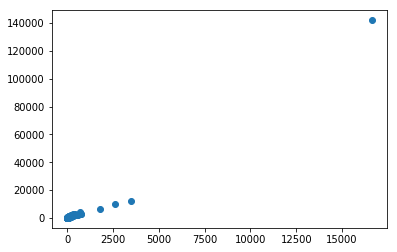

In [54]:
plt.scatter(x=df['burglary'],y=df['property_crime'])
plt.show()

In [52]:
df['population']= df['population']< 40000
c=df['property_crime']


TypeError: '<' not supported between instances of 'str' and 'int'